 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initialize imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import time

%matplotlib inline

#Initialize file paths
# File path for whale_returns
whale_csv = Path('../Starter_code/Resources/whale_returns.csv')

# file path for algo_returns
algo_csv = Path('../Starter_code/Resources/algo_returns.csv')

# file path for sp_tsx_history
sp_tsx_csv = Path('../Starter_code/Resources/sp_tsx_history.csv')

# file path for amazon close
amazon = Path('../Starter_code/Resources/Gfstocks/amazon.csv')

# file path for meta close
meta = Path('../Starter_code/Resources/Gfstocks/meta.csv')

# file path for tesla close
tesla = Path('../Starter_code/Resources/Gfstocks/tesla.csv')


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Read whale returns file and set the index as 'Date' colum
whale_returns = pd.read_csv(whale_csv, index_col ='Date')

In [3]:
#lets convert the Date to datetime 
whale_returns.index = pd.to_datetime(whale_returns.index, format='%Y-%m-%d')

# lets sort the date by its index in ascending order
whale_returns = whale_returns.sort_index()

# Lets display the whale Returns data
whale_returns.head(n=5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.count()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls,
whale_returns.dropna(axis=0, inplace = True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Read algo returns file and set the index as 'Date' colum
algo_returns = pd.read_csv(algo_csv, index_col ='Date')


In [7]:
#lets convert the Date to datetime 
algo_returns.index = pd.to_datetime(algo_returns.index, format='%Y-%m-%d')

# Also sort the data by its index in ascending order
algo_returns = algo_returns.sort_index()

# Lets display the Algo Returns data
algo_returns.head(n=5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.count()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(axis=0,inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_returns = pd.read_csv(sp_tsx_csv, index_col = 'Date')

# lets convert the Date to datetime 
sp_tsx_returns.index = pd.to_datetime(sp_tsx_returns.index, format='%d-%b-%Y')

# lets remove $ sign :)

sp_tsx_returns['Close'] = sp_tsx_returns['Close'].str.replace('$', '')

# Also sort the data by its index in ascending order
sp_tsx_returns = sp_tsx_returns.sort_index()

# Lets display the Algo Returns data
sp_tsx_returns.head(n=5)

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [11]:
# Check Data Types
sp_tsx_returns.dtypes

Close    object
dtype: object

In [12]:
# fix the Data Types (lets remove the commas in the column)

numeric_columns = ['Close'] 
for column in numeric_columns:
    sp_tsx_returns[column] = sp_tsx_returns[column].replace(',', '', regex=True)

# Convert entire Data frame to float using .astype    
sp_tsx_returns = sp_tsx_returns.astype(float)


In [13]:
# Calculate Daily Returns
sp_tsx_returns['Close'] = sp_tsx_returns['Close'].pct_change()

In [14]:
# Drop nulls
sp_tsx_returns.dropna(axis=0,inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.rename(columns={'Close': 'S&P TSX'}, inplace=True)
sp_tsx_returns.head(n=5)

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns,sp_tsx_returns ], axis="columns", join="inner")
combined_returns.tail(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
# Plot daily returns of all portfolios

# Define a list of colors for each combined return
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink']

# Create a plot with different colors for each combined return
combined_returns.plot(figsize=(13, 9), linewidth=2, color=colors, linestyle='-')

# Customize plot labels and title
plt.title('Combined Returns Over Time', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Combined Returns', fontsize=18)

# Customize tick parameters and grid lines
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()

# Plot cumulative returns

# Define a list of colors for each return
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink']

# Create a cumulative returns plot with different colors for each return
cumulative_returns.plot(figsize=(13, 9), linewidth=2, color=colors, linestyle='-')

# Customize plot labels and title
plt.title('Cumulative Returns Over Time', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Cumulative Returns', fontsize=18)

# Customize tick parameters and grid lines
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk

plt.figure(figsize= (13,9))

combined_returns.plot(kind='box', vert=False, flierprops=dict(markerfacecolor='r', marker='s'))

plt.title('Box Plot for Each Portfolio', fontsize=20)
plt.xlabel('Returns', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std.head(n=7)   

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60

sp_stx_std = daily_std.loc['S&P TSX']

# Determine which portfolios are riskier than the S&P TSX 60

riskier_portfolios =  daily_std[daily_std > sp_stx_std]
riskier_portfolios



### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(n=7)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()

#Plot the 21 day Rolling std window
rolling_std.plot(figsize=(13,9), title = 'Rolling window 21-Days')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')

# Show the plot
plt.show()


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation.plot(figsize=(13,9), title = 'Correlation Matrix')
plt.xlabel('')
plt.ylabel('Correlation')

plt.xticks(rotation = 8, ha ='right')

# Show the plot
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio
covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['S&P TSX'])

# Calculate variance of S&P TSX
variance = combined_returns['S&P TSX'].rolling(window=60).var()

# Computing beta
# Calculate 30-day rolling beta of Algo 1 and plot the data
rolling_beta = covariance / variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window with a 21 day half life

half_life = 21

span = int(np.ceil((half_life / np.log(2))))

# Calculate EMA for 'Algo 1' returns
algo_returns_ema = combined_returns['Algo 1'].ewm(span=span).mean()

# Calculate EMA for 'S&P TSX' returns
sp_tsx_returns_ema = combined_returns['S&P TSX'].ewm(span=span).mean()

# Calculate EMA using Pandas ewm method with rolling window

rolling_beta_ema = algo_returns_ema / sp_tsx_returns_ema


# Display the EMA values
print(rolling_beta_ema)




---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios

## lets use a risk free rate of 3%
risk_free_rate = 0.03

## lets calculate the sharpe ratio over the 252 trading days
sharpe_ratios = ((combined_returns - risk_free_rate) * 252) / (daily_std * np.sqrt(252))
sharpe_ratios.head(5)

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(12,8), color=colors, rot=0)
plt.title('Sharpe Ratios for Portfolios')
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Answer: Looking at the Sharpe ratio, it's clear that the Algorithmic strategies (Algo 1 and Algo 2) are doing better than both the market (S&P) and the whale portfolios. These strategies consistently give a high Sharpe ratios, which is a good sign. Overall, they have low ups and downs (standard deviations), and their total gains over time are similar or better than the others. The algorithmic strategies did really well compared to the others.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [17]:
# Reading data from 1st stock
amazon_stock = pd.read_csv(amazon, index_col = 'Date')

# Also sort the data by its index in ascending order
amazon_stock = amazon_stock.sort_index()

# drop 'symbol' column
amazon_stock.drop(columns='Symbol', inplace=True)

In [18]:
# Reading data from 2nd stock
meta_stock = pd.read_csv(meta, index_col = 'Date')

# Also sort the data by its index in ascending order
meta_stock = meta_stock.sort_index()

# drop 'symbol' column
meta_stock.drop(columns='Symbol', inplace=True)

In [19]:
# Reading data from 3rd stock
tesla_stock = pd.read_csv(tesla, index_col = 'Date')

# Also sort the data by its index in ascending order
tesla_stock = tesla_stock.sort_index()

# drop 'symbol' column
tesla_stock.drop(columns='Symbol', inplace=True)

In [20]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([amazon_stock, meta_stock,tesla_stock ], axis=1, join="inner")

In [21]:
# Reset Date index
combined_stock_reset_index = combined_stocks.reset_index()

In [22]:
# Reorganize portfolio data by having a column per symbol

combined_stock_reset_index.rename(columns={'Date': 'Date', 'Close A': 'AMZN', 'Close M': 'META', 'Close T': 'TSLA'}, inplace=True)

# Display the reorganized DataFrame
print(combined_stock_reset_index)

                   Date    AMZN    META   TSLA
0    1/10/2018 16:00:00   62.72  187.84  22.32
1    1/11/2018 16:00:00   63.83  187.77  22.53
2    1/12/2018 16:00:00   65.26  179.37  22.41
3    1/16/2018 16:00:00   65.24  178.39  22.67
4    1/17/2018 16:00:00   64.75  177.60  23.14
..                  ...     ...     ...    ...
246  9/28/2018 16:00:00  100.15  164.46  17.65
247   9/4/2018 16:00:00  101.98  171.16  19.26
248   9/5/2018 16:00:00   99.74  167.18  18.72
249   9/6/2018 16:00:00   97.92  162.53  18.73
250   9/7/2018 16:00:00   97.60  163.04  17.55

[251 rows x 4 columns]


In [23]:
# Convert 'Date' column to datetime
combined_stock_reset_index['Date'] = pd.to_datetime(combined_stock_reset_index['Date'])

# Set 'Date' column as the index
combined_stock_reset_index.set_index('Date', inplace=True)

# Calculate daily returns
stock_daily_returns = combined_stock_reset_index.pct_change()

# Drop NAs in place
stock_daily_returns.dropna(inplace=True)

# Display sample data
print(stock_daily_returns.head())


                         AMZN      META      TSLA
Date                                             
2018-01-11 16:00:00  0.017698 -0.000373  0.009409
2018-01-12 16:00:00  0.022403 -0.044736 -0.005326
2018-01-16 16:00:00 -0.000306 -0.005464  0.011602
2018-01-17 16:00:00 -0.007511 -0.004428  0.020732
2018-01-18 16:00:00 -0.001236  0.012387 -0.007347


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [24]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = stock_daily_returns.dot(weights)

# Display sample data
print(weighted_returns)


Date
2018-01-11 16:00:00    0.008911
2018-01-12 16:00:00   -0.009220
2018-01-16 16:00:00    0.001944
2018-01-17 16:00:00    0.002931
2018-01-18 16:00:00    0.001268
                         ...   
2018-09-28 16:00:00   -0.056645
2018-09-04 16:00:00    0.050077
2018-09-05 16:00:00   -0.024419
2018-09-06 16:00:00   -0.015176
2018-09-07 16:00:00   -0.021044
Length: 250, dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [25]:
# Join your returns DataFrame to the original returns DataFrame
joined_returns = pd.concat([stock_daily_returns, combined_returns], axis=1)

# Display the first 5 rows of the joined DataFrame
joined_returns.head(5)


,AMZN,META,TSLA,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,,,
2015-03-03,NaN,NaN,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,NaN,NaN,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,NaN,NaN,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,NaN,NaN,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,NaN,NaN,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [26]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

# Fill missing values with the mean
joined_returns.fillna(joined_returns.mean(), inplace=True)

# Display the DataFrame with valid dates
print(joined_returns)



                AMZN      META      TSLA  SOROS FUND MANAGEMENT LLC  \
Date                                                                  
2015-03-03  0.003722  0.001878  0.000919                  -0.001266   
2015-03-04  0.003722  0.001878  0.000919                   0.002230   
2015-03-05  0.003722  0.001878  0.000919                   0.004016   
2015-03-06  0.003722  0.001878  0.000919                  -0.007905   
2015-03-09  0.003722  0.001878  0.000919                   0.000582   
...              ...       ...       ...                        ...   
2019-04-25  0.003722  0.001878  0.000919                  -0.000285   
2019-04-26  0.003722  0.001878  0.000919                   0.008149   
2019-04-29  0.003722  0.001878  0.000919                   0.001254   
2019-04-30  0.003722  0.001878  0.000919                  -0.001295   
2019-05-01  0.003722  0.001878  0.000919                  -0.005847   

            PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Date         

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized `std`
joined_annualized_std = joined_returns* np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

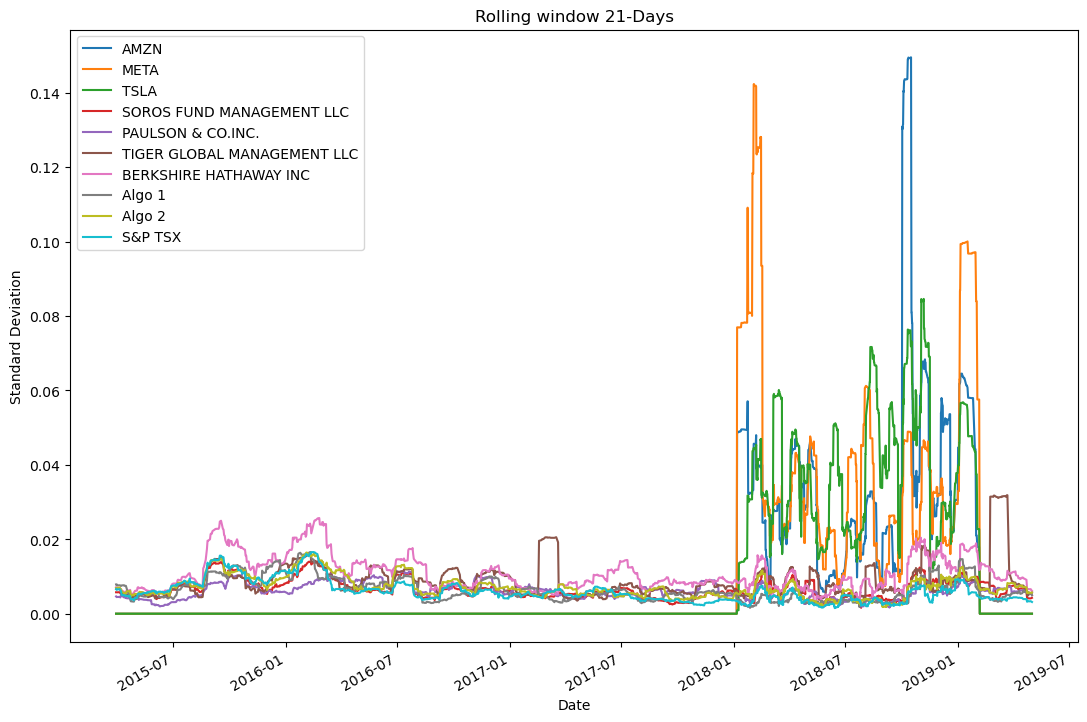

In [29]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_rolling_std = joined_returns.rolling(window=21).std()

#Plot the 21 day Rolling std window
joined_rolling_std.plot(figsize=(13,9), title = 'Rolling window 21-Days')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')

# Show the plot
plt.show()



### Calculate and plot the correlation

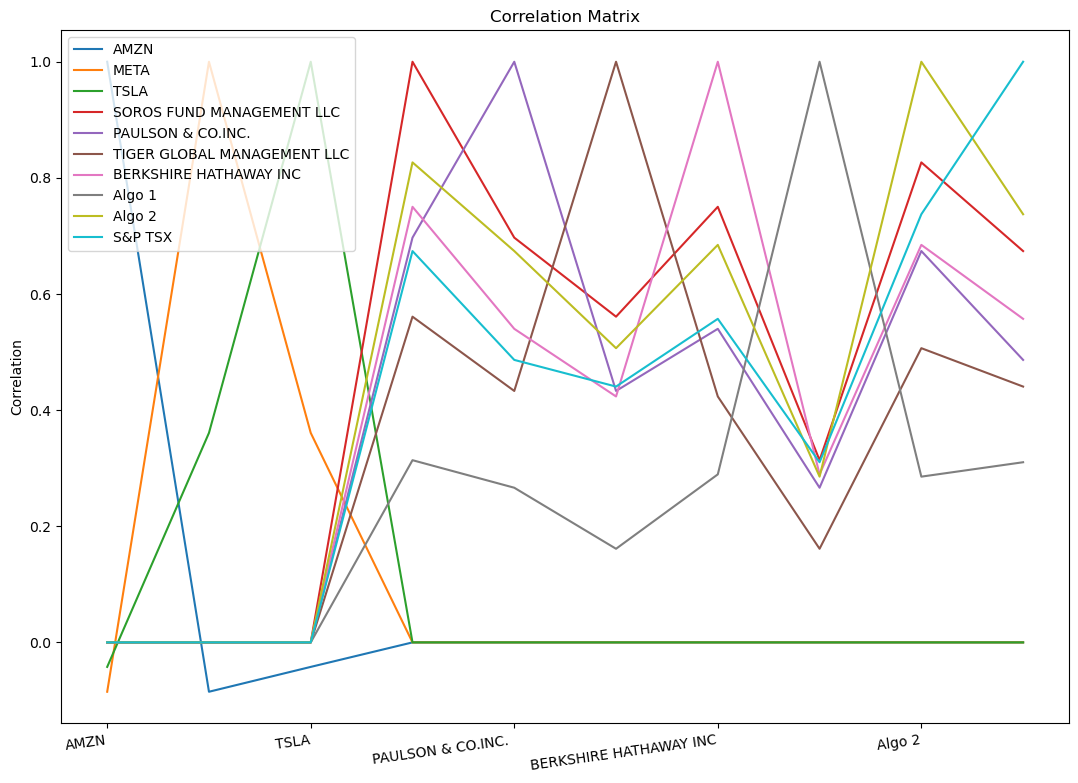

In [30]:
# Calculate and plot the correlation

joined_correlation = joined_returns.corr()

# Display de correlation matrix
joined_correlation.plot(figsize=(13,9), title = 'Correlation Matrix')
plt.xlabel('')
plt.ylabel('Correlation')

plt.xticks(rotation = 8, ha ='right')

# Show the plot
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta'}, xlabel='Date'>

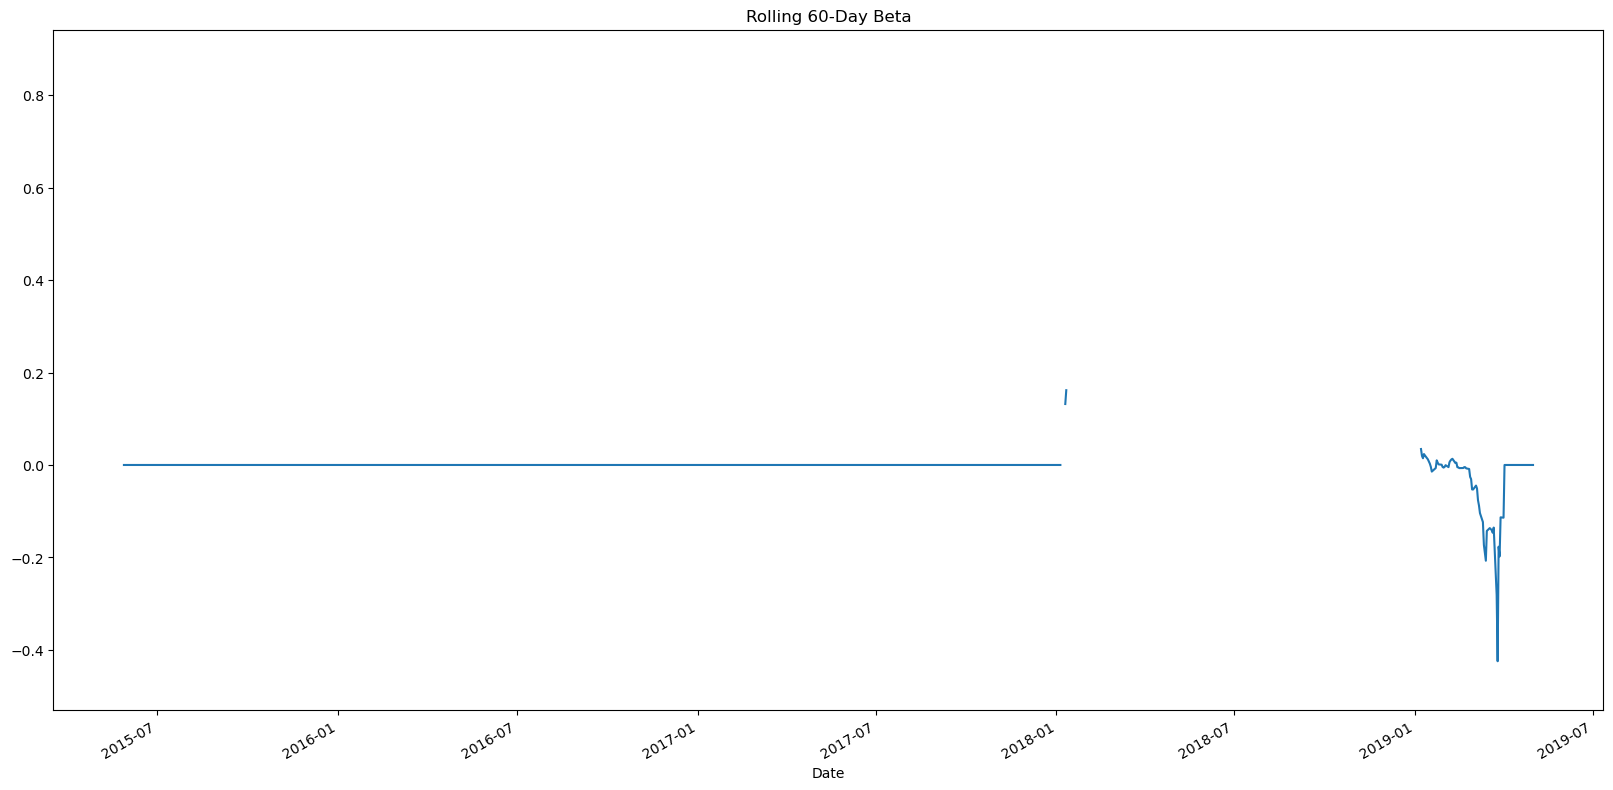

In [31]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
joined_covariance = joined_returns['AMZN'].rolling(window=60).cov(joined_returns['S&P TSX'])

# Calculate variance of S&P TSX
joined_variance = combined_returns['S&P TSX'].rolling(window=60).var()

# Computing beta
# Calculate 30-day rolling beta of Algo 1 and plot the data
joined_rolling_beta = joined_covariance / joined_variance

# Plot beta trend
joined_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Calculate Annualized Sharpe Ratios

## lets use a risk free rate of 3%
risk_free_rate = 0.03

## lets calculate the sharpe ratio over the 252 trading days
joined_sharpe_ratios = ((Joined_returns - risk_free_rate) * 252) / (Joined_rolling_std * np.sqrt(252))
joined_sharpe_ratios.head(5)



NameError: name 'Joined_returns' is not defined

In [33]:
# Visualize the sharpe ratios as a bar plot
joined_sharpe_ratios.plot(kind='bar', figsize=(12,8), color=colors, rot=0)
plt.title('Sharpe Ratios for joined Portfolios')
plt.show()

NameError: name 'joined_sharpe_ratios' is not defined

### How does your portfolio do?

Write your answer here!